In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# audio files
sound_one_file = "data/sound_one.wav"
sound_two_file = "data/sound_two.wav"

# load audio files with librosa
sound_one, sr1 = librosa.load(sound_one_file, sr=44100)
sound_two, sr2 = librosa.load(sound_two_file, sr=44100)


sound_one.size


776807

In [4]:
sample_duration = 1 / sr1
total_duration = sample_duration * sound_one.size
print(f"Duration of sound_one: {total_duration} seconds")

Duration of sound_one: 17.61467120181406 seconds


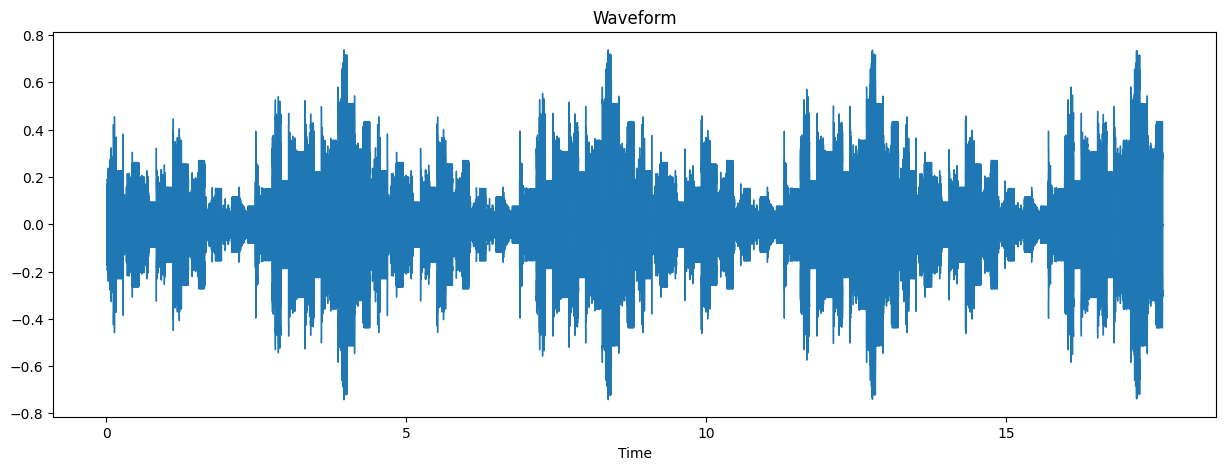

In [5]:
# visualize the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(sound_one, sr=sr1)
plt.title("Waveform")
plt.savefig("data/waveform_sound_one.png")

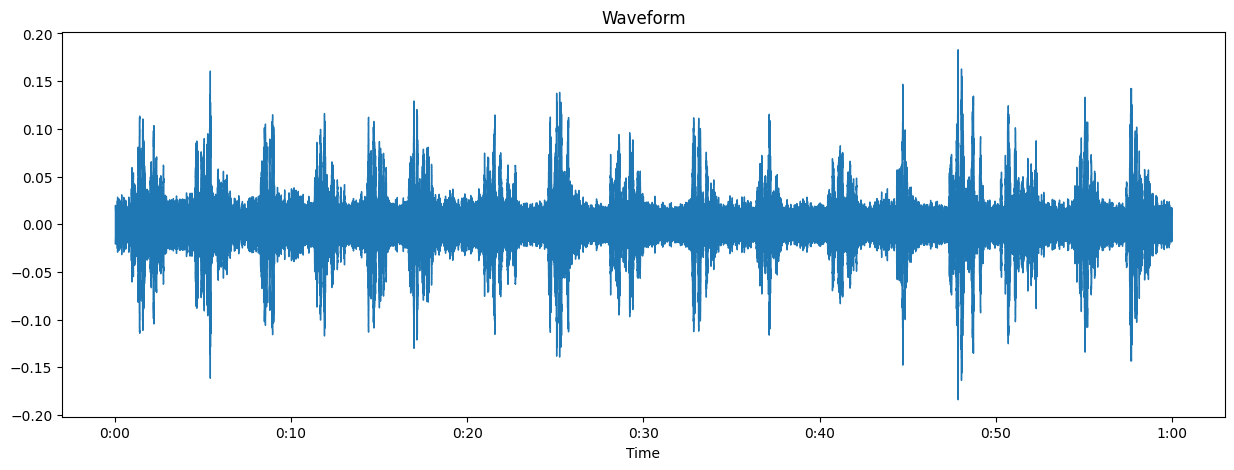

In [6]:
# visualize the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(sound_two, sr=sr2)
plt.title("Waveform")
# plt.show()
plt.savefig("data/waveform_sound_two.png")

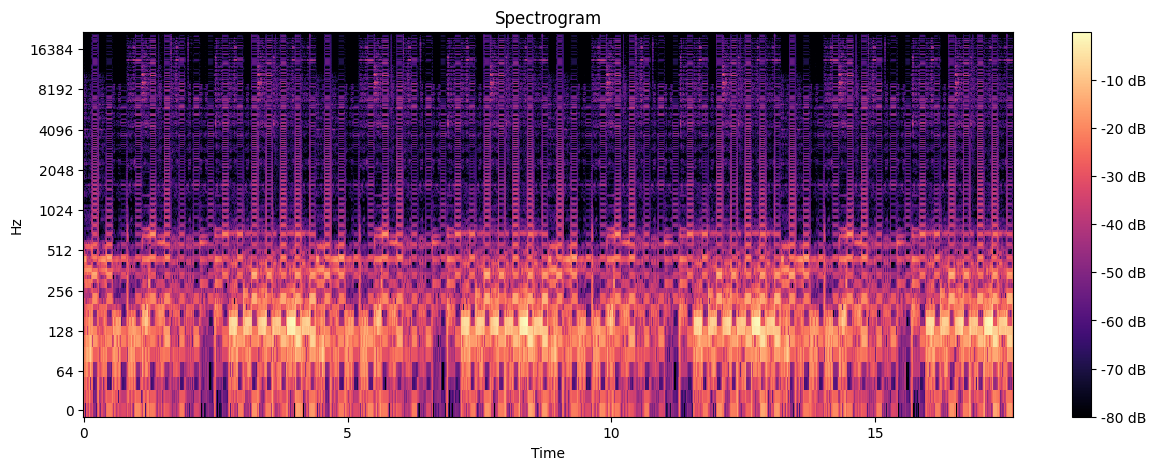

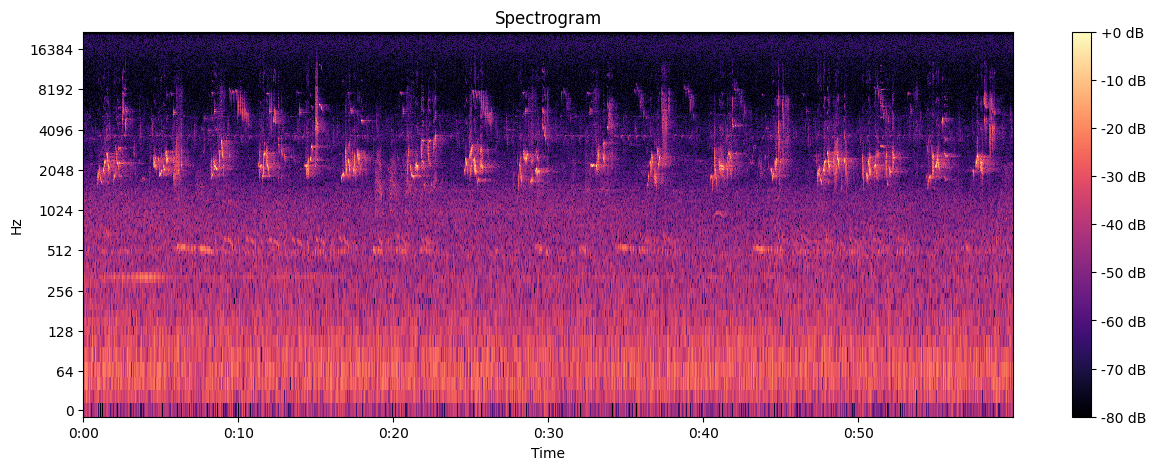

In [8]:
# Convert waveform to spectrogram
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(sound_one)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(sound_two)), ref=np.max)

# Plot the spectrogram for sound_one
plt.figure(figsize=(15, 5))
librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.savefig("data/spectrogram_sound_one.png")

# Plot the spectrogram for sound_two
plt.figure(figsize=(15, 5))
librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.savefig("data/spectrogram_sound_two.png")

In [12]:
from PIL import Image

# Open the images
image1 = Image.open("data/waveform_sound_one.png")
image2 = Image.open("data/spectrogram_sound_one.png")

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new image with a width that is the sum of both images' widths and the height of the taller image
new_image = Image.new('RGB', (width1 + width2, max(height1, height2)))

# Paste the images into the new image
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))

# Save the new image
new_image.save("data/combined_spectrogram_waveform.png")

In [13]:
from PIL import Image

# Open the images
image1 = Image.open("data/waveform_sound_two.png")
image2 = Image.open("data/spectrogram_sound_two.png")

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new image with a width that is the sum of both images' widths and the height of the taller image
new_image = Image.new('RGB', (width1 + width2, max(height1, height2)))

# Paste the images into the new image
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))

# Save the new image
new_image.save("data/combined_spectrogram_waveform_2.png")

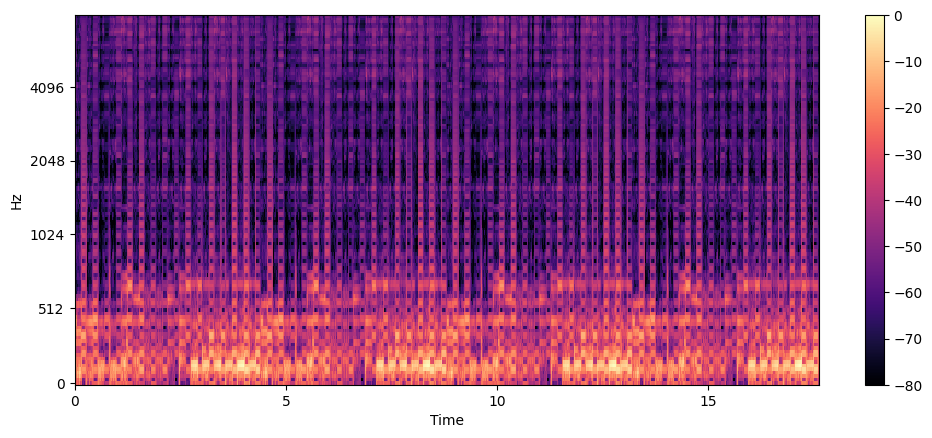

In [5]:
S = librosa.feature.melspectrogram(y=sound_one, sr=sr1, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr1, fmax=8000)
plt.colorbar()

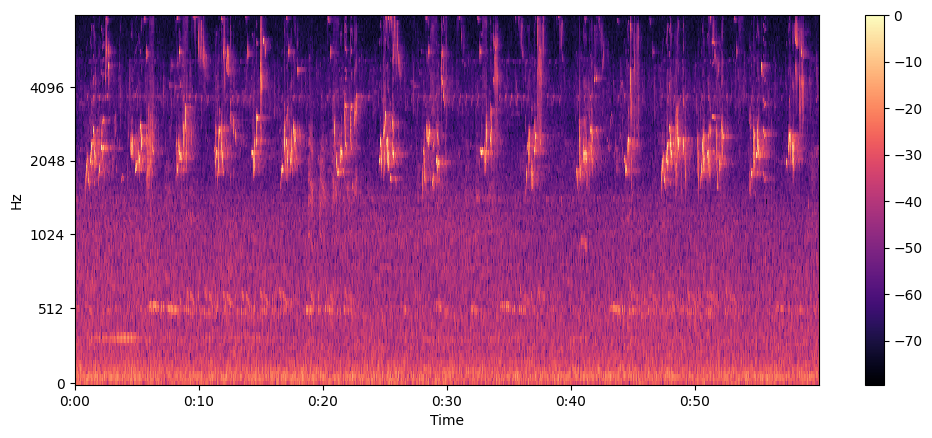

In [6]:
S = librosa.feature.melspectrogram(y=sound_two, sr=sr1, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr2, fmax=8000)
plt.colorbar()